# 데이터베이스 개체

- 테이블은 데이터베이스의 핵심 개체
- 데이터베이스에는 테이블 외에 인덱스, 뷰, 스토어드 프로시저, 트리거, 함수, 커서 등의 개체도 필요

**인덱스**
- 데이터를 조회할 때 결과가 나오는 속도를 획기적으로 빠르게 해줌
- 책의 제일 뒤에 수록되는 찾아보기와 비슷한 개념 

**뷰**
- 테이블의 일부를 제한적으로 표현할 때 주로 사용
- 테이블과 상당히 동일한 성격의 데이터베이스 개체
- 가상의 테이블 
- 진짜 테이블에 링크된 개념 
- 윈도우즈 운영 체제의 바로 가기 아이콘과 비슷한 개념 

**스토어드 프로시저**
- SQL에서 프로그래밍이 가능하도록 해줌
- MySQL에서 제공하는 프로그래밍 기능
- 여러 개의 SQL 문을 하나로 묶어서 편리하게 사용 가능 
- 연산식, 조건문, 반복문 등 사용 가능 

**트리거**
- 잘못된 데이터가 들어가는 것을 미연에 방지하는 기능 

**개체 생성문**
- CREATE

## 인덱스 실습 성공 결과

In [ ]:
CREATE INDEX idx_member_name ON member (member_name);
SELECT * FROM member WHERE member_name = '아이유';

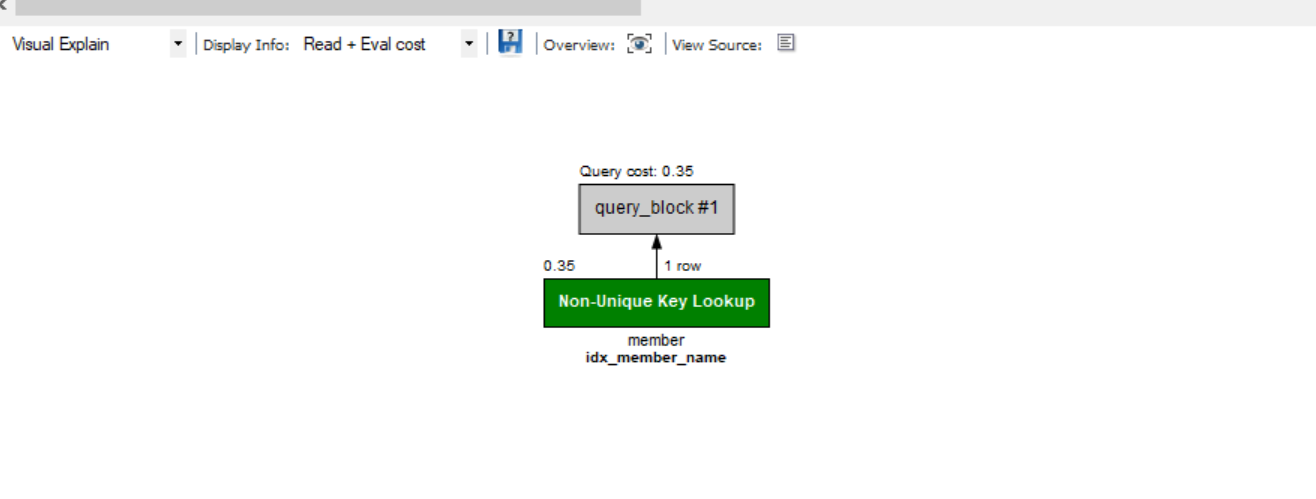

## 뷰 실습 성공 결과 

- 보안에 도움이 됨
- 긴 SQL 문을 간략하게 만들 수 있음

In [ ]:
CREATE VIEW member_view AS SELECT * FROM member;
SELECT * FROM member_view;

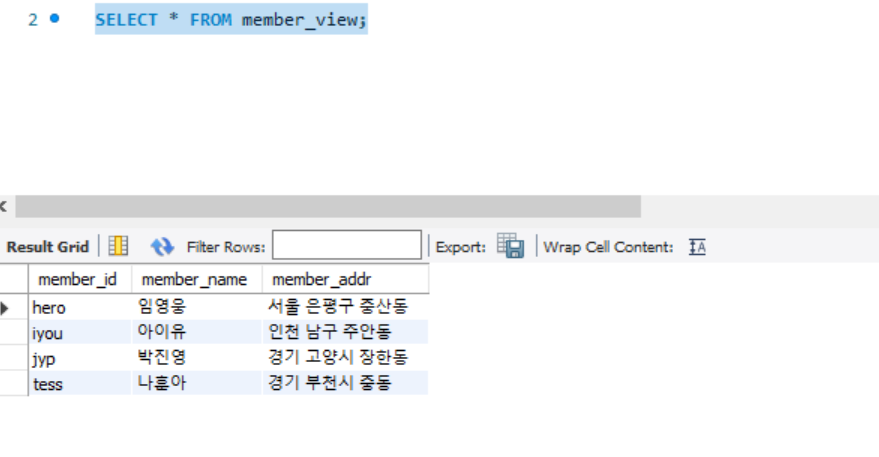

## 스토어드 프로시저 실습 성공 결과

- BEGIN과 END 사이에 SQL문 넣기

In [ ]:
# 별도의 탭으로 동시에 결과가 나옴
SELECT * FROM member WHERE member_name = '나훈아';
SELECT * FROM product WHERE product_name = '삼각김밥';

# 스토어드 프로시저로 묶음
DELIMITER //
CREATE PROCEDURE myProc() # 스토어드 프로시저 이름 지정
BEGIN
    SELECT * FROM member WHERE member_name = '나훈아';
    SELECT * FROM product WHERE product_name = '삼각김밥';
END // 
DELIMITER ;

# 스토어드 프로시저 호출
CALL myProc();

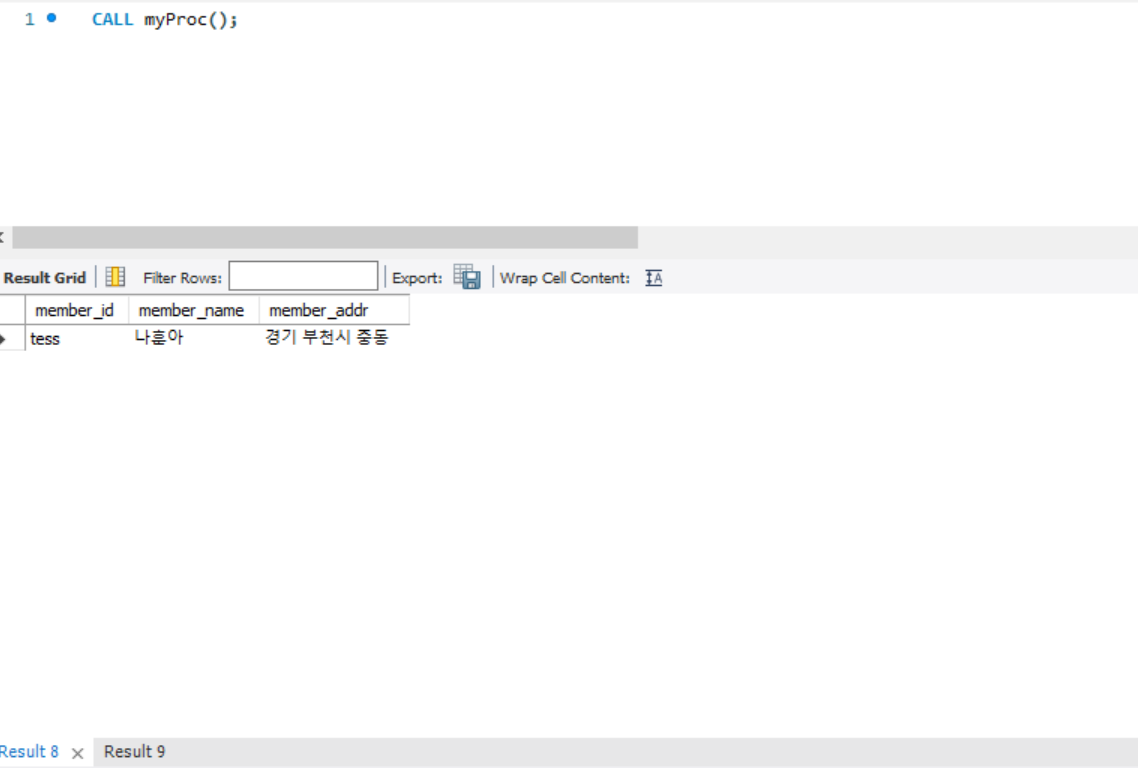

# SQL 기본 문법

**SELECT**
- 구축이 완료된 테이블에서 데이터를 추출하는 기능
- 가장 기본 형식 : SELECT ~ FROM ~ WHERE
- SELECT 바로 다음에는 열 이름이, FROM 다음에는 테이블 이름이 나옴. WHERE 다음에는 조건식 

## 실습용 데이터베이스 만들기

In [ ]:
DROP DATABASE IF EXISTS market_db; #  만약 market_db가 존재하면 우선 삭제한다.
CREATE DATABASE market_db; # 데이터베이스 새로 만들기 

USE market_db; 
CREATE TABLE member -- 회원 테이블
( mem_id  		CHAR(8) NOT NULL PRIMARY KEY, -- 사용자 아이디(PK)
  mem_name    	VARCHAR(10) NOT NULL, -- 이름
  mem_number    INT NOT NULL,  -- 인원수
  addr	  		CHAR(2) NOT NULL, -- 지역(경기,서울,경남 식으로 2글자만입력)
  phone1		CHAR(3), -- 연락처의 국번(02, 031, 055 등)
  phone2		CHAR(8), -- 연락처의 나머지 전화번호(하이픈제외)
  height    	SMALLINT,  -- 평균 키
  debut_date	DATE  -- 데뷔 일자
);
CREATE TABLE buy -- 구매 테이블 
(  num 		INT AUTO_INCREMENT NOT NULL PRIMARY KEY, -- 순번(PK)
   mem_id  	CHAR(8) NOT NULL, -- 아이디(FK)
   prod_name 	CHAR(6) NOT NULL, --  제품이름
   group_name 	CHAR(4)  , -- 분류
   price     	INT  NOT NULL, -- 가격
   amount    	SMALLINT  NOT NULL, -- 수량
   FOREIGN KEY (mem_id) REFERENCES member(mem_id)
);

INSERT INTO member VALUES('TWC', '트와이스', 9, '서울', '02', '11111111', 167, '2015.10.19');
INSERT INTO member VALUES('BLK', '블랙핑크', 4, '경남', '055', '22222222', 163, '2016.08.08');
INSERT INTO member VALUES('WMN', '여자친구', 6, '경기', '031', '33333333', 166, '2015.01.15');
INSERT INTO member VALUES('OMY', '오마이걸', 7, '서울', NULL, NULL, 160, '2015.04.21');
INSERT INTO member VALUES('GRL', '소녀시대', 8, '서울', '02', '44444444', 168, '2007.08.02');
INSERT INTO member VALUES('ITZ', '잇지', 5, '경남', NULL, NULL, 167, '2019.02.12');
INSERT INTO member VALUES('RED', '레드벨벳', 4, '경북', '054', '55555555', 161, '2014.08.01');
INSERT INTO member VALUES('APN', '에이핑크', 6, '경기', '031', '77777777', 164, '2011.02.10');
INSERT INTO member VALUES('SPC', '우주소녀', 13, '서울', '02', '88888888', 162, '2016.02.25');
INSERT INTO member VALUES('MMU', '마마무', 4, '전남', '061', '99999999', 165, '2014.06.19');

INSERT INTO buy VALUES(NULL, 'BLK', '지갑', NULL, 30, 2);
INSERT INTO buy VALUES(NULL, 'BLK', '맥북프로', '디지털', 1000, 1);
INSERT INTO buy VALUES(NULL, 'APN', '아이폰', '디지털', 200, 1);
INSERT INTO buy VALUES(NULL, 'MMU', '아이폰', '디지털', 200, 5);
INSERT INTO buy VALUES(NULL, 'BLK', '청바지', '패션', 50, 3);
INSERT INTO buy VALUES(NULL, 'MMU', '에어팟', '디지털', 80, 10);
INSERT INTO buy VALUES(NULL, 'GRL', '혼공SQL', '서적', 15, 5);
INSERT INTO buy VALUES(NULL, 'APN', '혼공SQL', '서적', 15, 2);
INSERT INTO buy VALUES(NULL, 'APN', '청바지', '패션', 50, 1);
INSERT INTO buy VALUES(NULL, 'MMU', '지갑', NULL, 30, 1);
INSERT INTO buy VALUES(NULL, 'APN', '혼공SQL', '서적', 15, 1);
INSERT INTO buy VALUES(NULL, 'MMU', '지갑', NULL, 30, 4);

SELECT * FROM member;
SELECT * FROM buy;

## 기본 조회하기 : SELECT ~ FROM

- SELECT 문을 실행하려면 먼지 사용할 데이터베이스를 지정해야 함
- USE 데이터베이스_이름;
- 다시 USE 문을 사용하거나 다른 DB를 사용하겠다고 명시하지 않으면 모든 SQL문은 해당 db에서 수행됨 

In [ ]:
# 전체
SELECT 열_이름
    FROM 테이블_이름
    WHERE 조건식
    GROUP BY 열_이름
    HAVING 조건식
    ORDER BY 열_이름
    LIMIT 숫자

# 기본
SELECT 열_이름
    FROM 테이블_이름
    WHERE 조건식

In [ ]:
# 예시
USE market_db;
SELECT * FROM member;

# 원칙
SELECT * FROM market_db.member; #  데이터베이스_이름.테이블_이름 형식으로 표현

# 필요한 열만 추출
SELECT mem_name FROM member;

# 여러 개의 열 추출
SELECT addr, debut_date, mem_name FROM member;

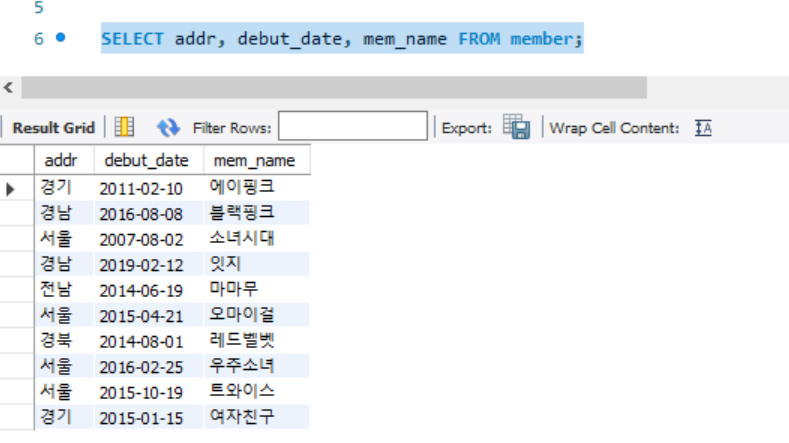

## 특정한 조건만 조회하기 : SELECT ~ FROM ~ WHERE

- WHERE 절은 조회하는 결과에 특정한 조건을 추가해서 원하는 테이블만 보고 싶을 떄 사용
- SELECT 열_이름 FROM 테이블_이름 WHERE 조건식;

In [ ]:
SELECT * FROM member WHERE mem_name = '블랙핑크'; # 문자형이므로 작은 따옴표
SELECT * FROM member WHERE mem_number = 4;

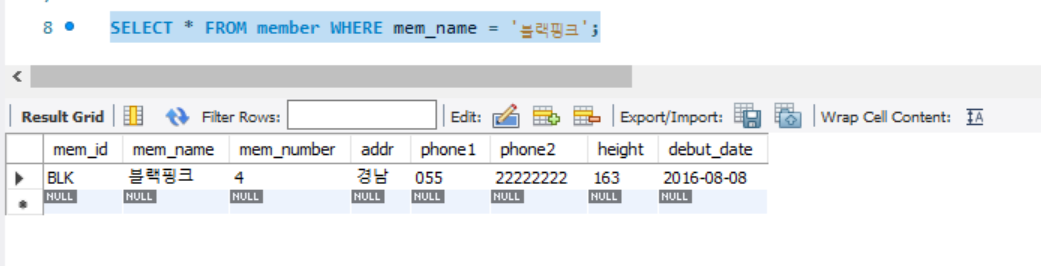

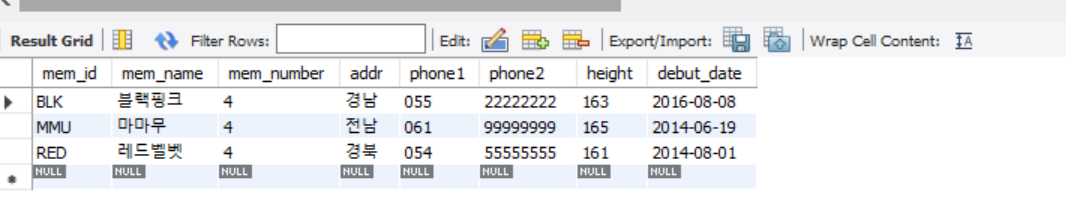